# A Countries' Secret to Happiness
> Answering the question "What makes us happy?"

## Introduction

As part of the Final Project for A1C1 Univ.ai's Course, the team - Vishnu, Sakthisree, Neigil and Rishab - started their journey to leverage Machine Learning for trying to answer the age-old question of - **what exactly makes us happy?**

The World Happiness Report may be a point of interest survey of the state of worldwide bliss. The primary report was distributed in 2012, the second in 2013, the third in 2015, and the fourth within the 2016 Upgrade. The World Joy 2017, which positions 155 nations by their bliss levels, was discharged at the Joined together Countries at an occasion celebrating Universal Day of Joy on Walk 20th. 

![title](img/title.png.jpg)

The report proceeds to pick up worldwide acknowledgment as governments, organizations and respectful society progressively utilize joy pointers to educate their policy-making choices. Driving specialists over areas – financial matters, brain research, overview investigation, national insights, wellbeing, open approach and more – depict how estimations of well-being can be used effectively to evaluate the advance of countries. 

The reports survey the state of bliss within the world nowadays and appear how the modern science of bliss clarifies individual and national varieties in bliss.

There are six measurements taken per country for guaging the World Happiness Index. They consist of:

1. GDP per Capita - Gross Domestic Product per capita for the countries

2. Family - Satisfaction Rank of Family

3. Life Expectancy - Avg. expected years to live

4. Freedom - Perception of freedom quantified

5. Generosity - Numerical value estimated based on the perception of Generosity experienced by poll takers in their country.

6. Trust/Government Corruption - A quantification of the people's perceived trust in their governments.

7. Dystopia Score - Score based on comparison to hypothetically the saddest country in the world.

8. Dystopia Residual - Rank of any country in a particular year.

The Happiness Score is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder.

The joy scores and rankings utilize information from the Gallup World Survey. The scores are based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. 

The scores are from broadly agent tests for the a long time 2013-2016 and utilize the Gallup weights to create the gauges agent. The columns taking after the bliss score assess the degree to which each of six variables – financial generation, social back, life anticipation, flexibility, nonattendance of debasement, and liberality – contribute to making life assessments higher in each nation than they are in


**What is DYSTOPIA RESIDUAL?**

Dystopia is a hypothetical country consisting of the least happy people. It was formed so as to create a benchmark to compare Happiness Scores of other countries with it. 

The Dystopia Residual is calculated as (Score of Dystopia+ Residual for the corresponding country). 

Here the Residual is a value generated for each country, which indicates if the 6 variables have under or over explained the life evaluations for each country for that particular year.


## Problem Statement

Given the data available per country to guage the Hapiness Index, our aim is to:
    
1. **Part A** - Analyze and understand which factors affect the Happiness Index Score of countries
2. **Part B** - Analyze and understand the relationship between Terror Attacks and Happiness Index
3. **Part C** - Create a Model to predict the Happiness Index of a Country
4. **Part D** - To see how much Health contributes to the Happiness Index? With the current pandemic at hand, predicting COVID-19 Cases in the coming days for countries.
5. **Part E** - Creating a Dashbord for viewing COVID-19 Predictions

---------------------------------------------------------------------------------------------------------------------

## Ground work

### Importing the Necessary Libraries

In [1]:
#hide
#!pip install bubbly

In [2]:
#hide
#!conda install libpython m2w64-toolchain -c msys2

In [3]:
#hide
#!pip install pystan

In [4]:
#hide
#!pip install fbprophet

In [5]:
#hide
# importing the necessary libraries
import numpy as np
import pandas as pd
import glob
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import json
import altair as alt
from  altair.vega import v5
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics


In [6]:
#hide
#loading individual dataset reports for the years from 2015-2020
happiness_df_2015 = pd.read_csv("data/2015_report.csv")
happiness_df_2016 = pd.read_csv("data/2016_report.csv")
happiness_df_2017 = pd.read_csv("data/2017_report.csv")
happiness_df_2018 = pd.read_csv("data/2018_report.csv")
happiness_df_2019 = pd.read_csv("data/2019_report.csv")
happiness_df_2020 = pd.read_csv("data/2020_report.csv")

#adding column in each dataset to represent year
happiness_df_2015['year'] = 2015
happiness_df_2016['year'] = 2016
happiness_df_2017['year'] = 2017
happiness_df_2018['year'] = 2018
happiness_df_2019['year'] = 2019
happiness_df_2020['year'] = 2020

In [7]:
#hide
df = pd.DataFrame()

#merging all dataframes into one dataframe
df = df.append(happiness_df_2015)
df = df.append(happiness_df_2016)
df = df.append(happiness_df_2017)
df = df.append(happiness_df_2018)
df = df.append(happiness_df_2019)
df = df.append(happiness_df_2020)

#replacing na with 0
df = df.fillna(0)
targets = ['Low', 'Low-Mid', 'Top-Mid', 'Top']
df["target"] = pd.qcut(df['happiness_score'], len(targets), labels=targets)
df["target_n"] = pd.qcut(df['happiness_score'], len(targets), labels=range(len(targets)))
dff = df.drop(['country','continent','target','target_n','year'], axis = 1)

## Part A

To Analyze and understand which factors affect the Happiness Index Score of countries

## Explaratory Data Analysis

Our objective here is to look through the datasets and perform some basic analysis to understand and guage insights. 

### A look into Correlation

*The Spearman's Rank Correlation Coefficient is used to discover the strength of a link between two sets of data.*

+ If you have two numeric variables that are not linearly related, or if one or both of your variables are ordinal variables, you can still measure the strength and direction of their relationship using a non-parametric correlation statistic. 

+ The most common of these is the Spearman rank correlation coefficient, ρ, which considers the ranks of the values for the two variables.Spearman’s correlation is equivalent to calculating the Pearson correlation coefficient on the ranked data. So ρ will always be a value between -1 and 1. 

+ The further away ρ is from zero, the stronger the relationship between the two variables. The sign of ρ corresponds to the direction of the relationship. If it is positive, then as one variable increases, the other tends to increase. If it is negative, then as one variable increases, the other tends to decrease.

+ You use Spearman’s correlation if your data have a non-linear relationship (like an exponential relationship) or you have one or more outliers. However, Spearman’s correlation is only appropriate if the relationship between your variables is monotonic, meaning that as one variable increases, the other tends to either increase or decrease (not both)

In [8]:
#hide_input
spearman_cormatrix= df.corr(method='spearman')
spearman_cormatrix

dystopia_residual  family  freedom  gdp_per_capita  \
dystopia_residual               1.00    0.56    -0.00            0.06   
family                          0.56    1.00     0.01            0.21   
freedom                        -0.00    0.01     1.00            0.36   
gdp_per_capita                  0.06    0.21     0.36            1.00   
generosity                      0.16    0.23     0.33           -0.01   
government_trust                0.13    0.10     0.43            0.26   
happiness_score                 0.23    0.14     0.54            0.80   
health                         -0.05   -0.07     0.40            0.78   
social_support                 -0.59   -0.86     0.23            0.14   
year                            0.09   -0.59     0.06           -0.04   

                   generosity  government_trust  happiness_score  health  \
dystopia_residual        0.16              0.13             0.23   -0.05   
family                   0.23              0.10             0.14   -0.07   
freedom                  0.33              0.43             0.54    0.40   
gdp_per_capita          -0.01              0.26             0.80    0.78   
generosity               1.00              0.24             0.13   -0.02   
government_trust         0.24              1.00             0.32    0.18   
happiness_score          0.13              0.32             1.00    0.77   
health                  -0.02              0.18             0.77    1.00   
social_support          -0.18             -0.02             0.24    0.38   
year                    -0.10              0.02             0.03    0.07   

                   social_support  year  
dystopia_residual           -0.59  0.09  
family                      -0.86 -0.59  
freedom                      0.23  0.06  
gdp_per_capita               0.14 -0.04  
generosity                  -0.18 -0.10  
government_trust            -0.02  0.02  
happiness_score              0.24  0.03  
health                       0.38  0.07  
social_support               1.00  0.43  
year                         0.43  1.00

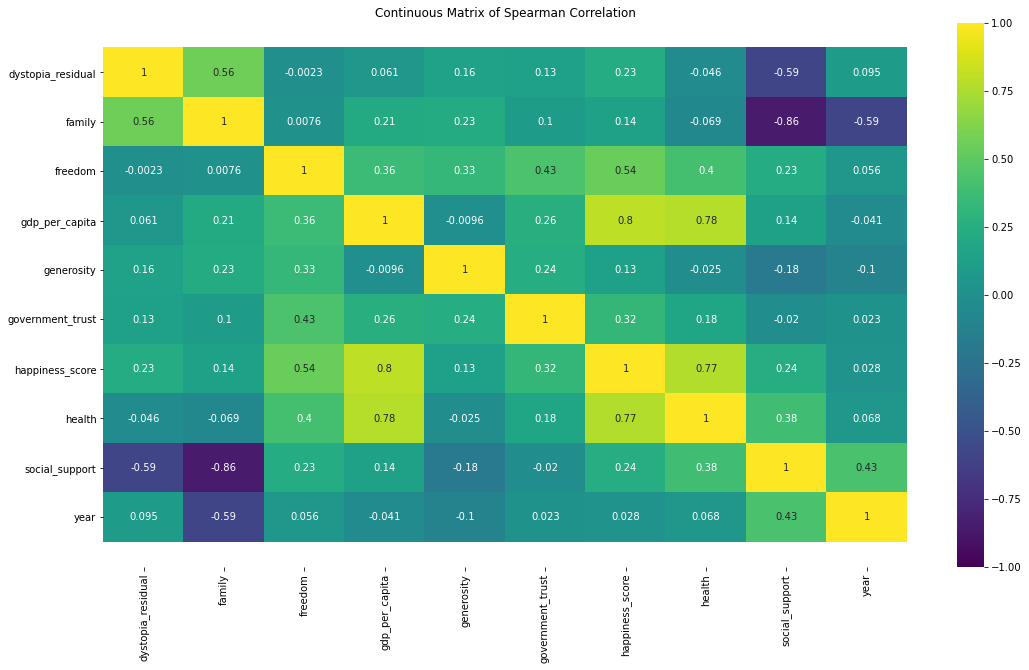

In [9]:
#hide_input
plt.figure(figsize=(18,10))
ax = sns.heatmap(spearman_cormatrix, vmin=-1, vmax=1, 
            center=0, cmap="viridis", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.title("Continuous Matrix of Spearman Correlation");

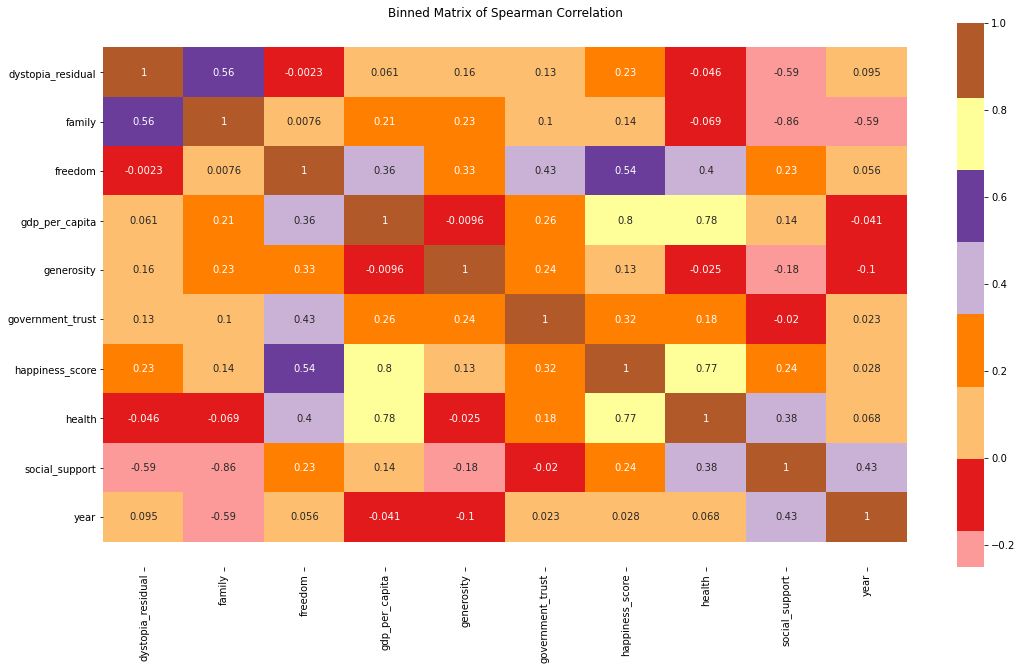

In [10]:
#hide_input
plt.figure(figsize=(18,10))
ax = sns.heatmap(spearman_cormatrix, vmin=-.25, vmax=1, center=0, cmap="Paired", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.title("Binned Matrix of Spearman Correlation");

**Inference**: From the above matrixes, it seems like *Health*, *GDP Per Capita* and *freedom* are the top 3 factors that correlate with happiness index.

#### Univariate Analysis

This type of analysis consists of use of single variable. The analysis of univariate data is thus the simplest form of analysis since the information deals with only one quantity that changes. It does not deal with causes or relationships and the main purpose of the analysis is to describe the data and find patterns that exist within it. 

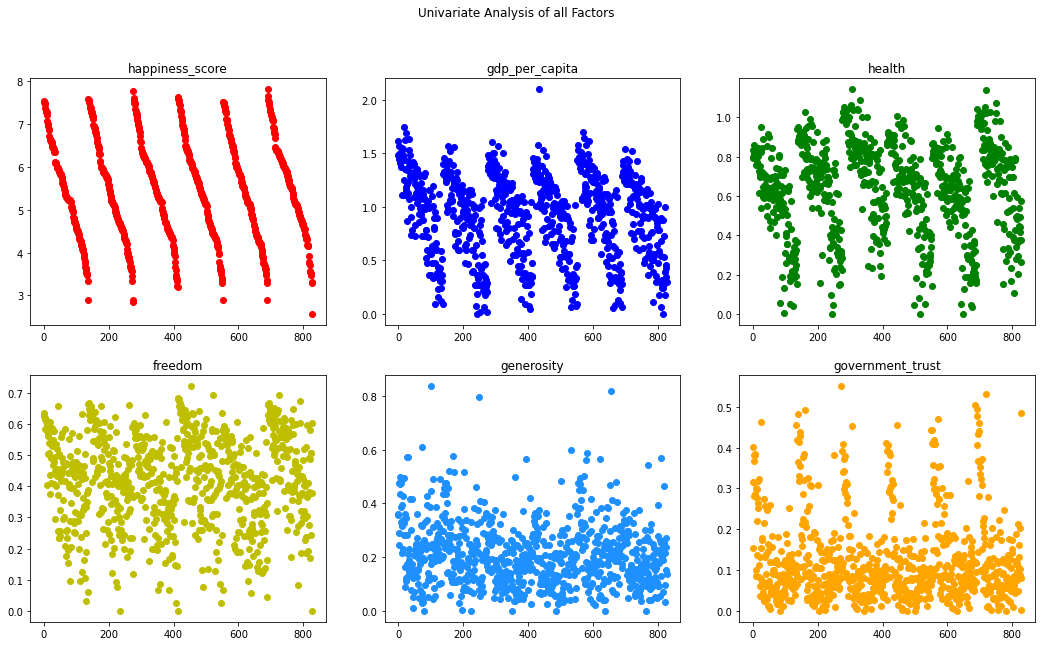

In [11]:
#hide_input
#univariate analysis
numerics = ['happiness_score', 'gdp_per_capita', 'health', 'freedom', 'generosity',
       'government_trust']
color = ['r','blue','g','y','dodgerblue','orange']

plt.figure(figsize = (18,10))
plt.suptitle("Univariate Analysis of all Factors")
for i in numerics:
    plt.subplot(2,3,numerics.index(i)+1)
    plt.scatter(np.arange(df.shape[0]),df[i], color = color[numerics.index(i)])
    plt.title(i)
plt.show()

#### Bivariate Analysis

This type of analysis involves two different variables. The analysis of this type of data deals with causes and relationships and the analysis is done to find out the relationship among the two variables

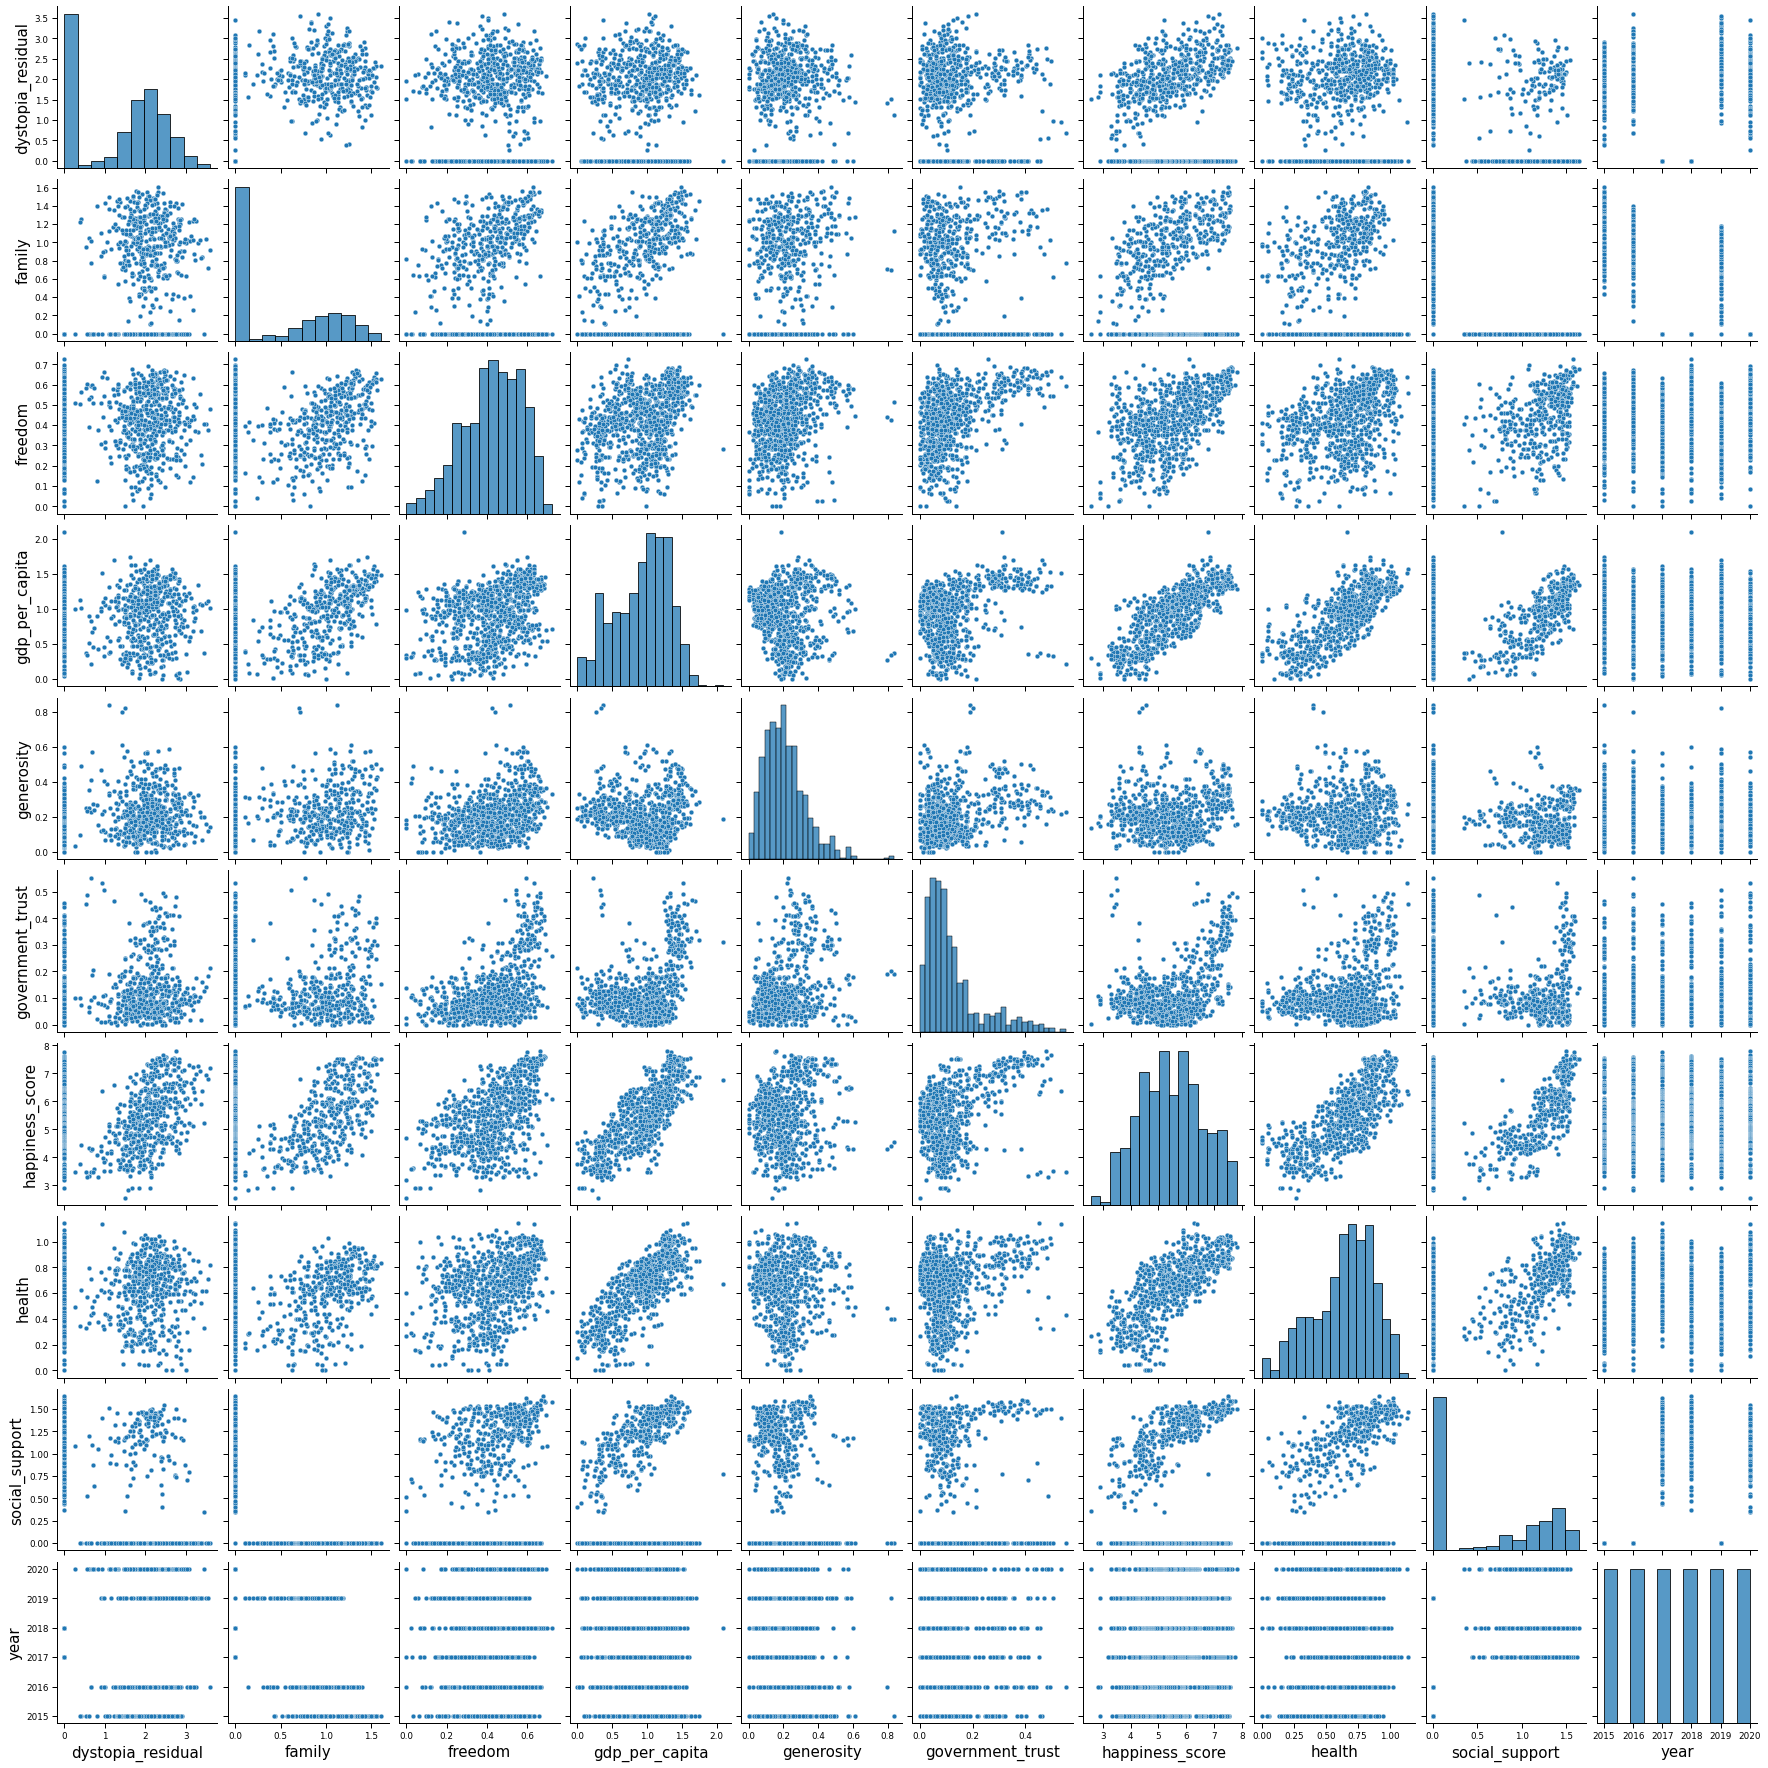

In [13]:
#hide_input
#Bivariate Analysis
#plt.figure(figsize=(18,20));
sns.set_context("paper", rc={"axes.labelsize":15})
sns.pairplot(df);

**Inference**:

From the above plot, we can infer that there seems to be a: <br/>
**Linear Relationship:** happiness_score v/s gdp_per_capita, happiness_score v/s health, happiness_score v/s freedom <br/>
**Non-Linear Relationship:** happiness_score v/s gerosity, happiness_score v/s government_trust

### Performing ANOVA test between predictors and response variable to guage how significantly it affects the scoring

Analysis of Variance is a statistical method, used to check the means of two or more groups that are significantly different from each other. It assumes Hypothesis as
H0: Means of all groups are equal.
H1: At least one mean of the groups are different.
    
+ If the distributions overlap or close, the grand mean will be similar to individual means whereas if distributions are far, the grand mean and individual means differ by larger distance.
+ It refers to variations between the groups as the values in each group are different. 
+ So in ANOVA, we will compare Between-group variability to Within-group variability.
+ ANOVA uses F-test check if there is any significant difference between the groups. 
+ If there is no significant difference between the groups that all variances are equal, the result of ANOVA’s F-ratio will be close to 1.

In [14]:
#hide_input
#performing ANOVA test
k_best = SelectKBest(f_classif,k="all")
k_best.fit_transform(dff.drop('happiness_score', axis=1), dff['happiness_score'])
p_values = pd.DataFrame({'column': dff.drop('happiness_score', axis=1).columns, 'p_value': k_best.pvalues_}).sort_values('p_value')
best_predictors = p_values[p_values['p_value'] < .05].iloc[:10,:]['column'].to_list()
print("The best predictors of Happiness Index are: ")
print(str(best_predictors))

The best predictors of Happiness Index are: 
['gdp_per_capita', 'government_trust', 'health', 'family']


Two of the aspects coming out of ANOVA test belong to our correlation inference i.e GDP per capita and health. Apart from that, it seems like government trust and family also play quite a significant role in realizing the happiness score.

### Looking at all countries and their ranks in Happiness Index Score

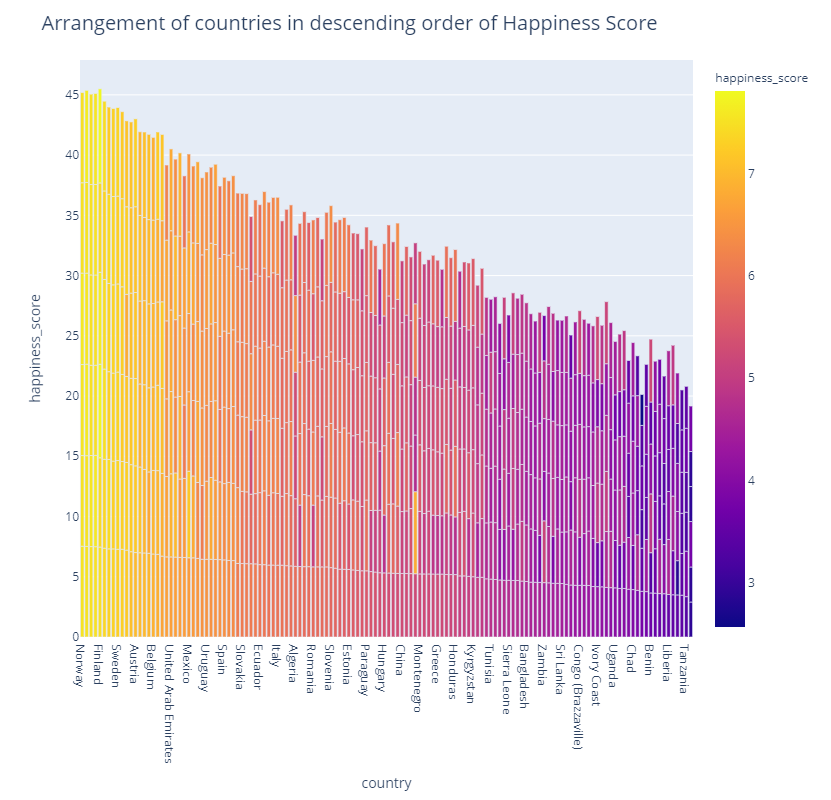

In [15]:
#hide_input
fig = px.bar(df, x='country', y='happiness_score',color='happiness_score',height=800)
fig.update_layout(title='Arrangement of countries in descending order of Happiness Score',titlefont_size=20)

py.iplot(fig, config={'scrollzoom': True})

**Inference**: Clearly Norwary seems to the top country scoring in Happiness Index. It is not surprising since European Countries have better living conditions. 

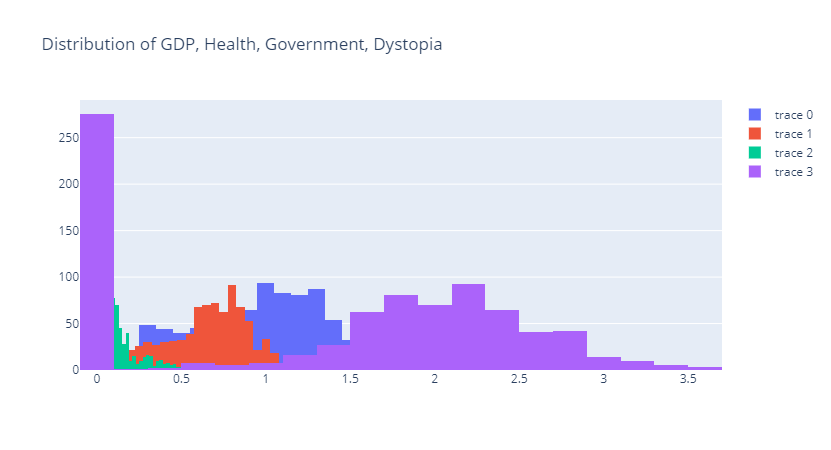

In [16]:
#hide_input
fig = go.Figure()
x0 = df['gdp_per_capita'].values
x1 = df['health'].values
x2 = df['government_trust'].values
x3 = df['dystopia_residual'].values

fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))
fig.add_trace(go.Histogram(x=x2))
fig.add_trace(go.Histogram(x=x3))

# Overlay both histograms
fig.update_layout(barmode='overlay', title="Distribution of GDP, Health, Government, Dystopia")
# Reduce opacity to see both histograms
fig.update_traces(opacity=1)
py.iplot(fig, config={'scrollzoom': True})

### Happiness with regards to Generosity and Economy

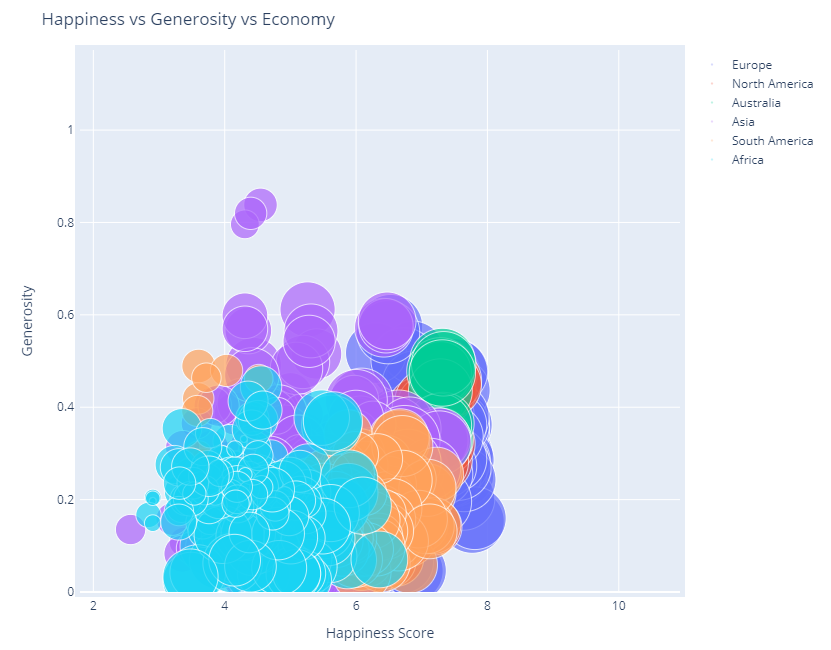

In [17]:
#hide_input
figure = bubbleplot(dataset = df, x_column = 'happiness_score', y_column = 'generosity', 
    bubble_column = 'country', size_column = 'gdp_per_capita', color_column = 'continent', 
    x_title = "Happiness Score", y_title = "Generosity", title = 'Happiness vs Generosity vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

**Inference**: The farther right side bubbless are mostly contries in the European Continents. Clearly they have better GDP Per capita. Surprisingly Europeans countries score average on Generosity(Asian countries have highest generosity) but have the most Happiness Score rankings. 

### Happiness with regards to Health and Economy

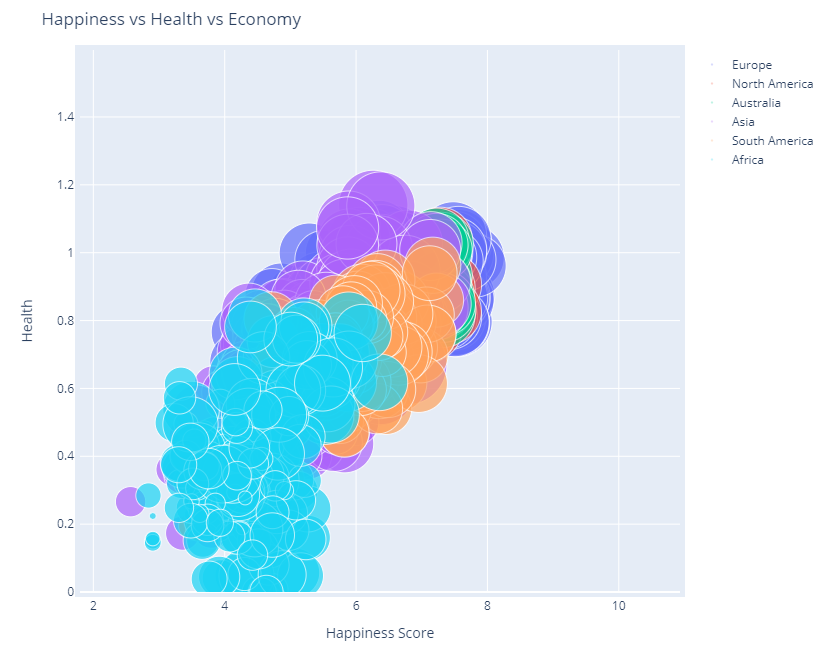

In [18]:
#hide_input
#hide_input
figure = bubbleplot(dataset = df, x_column = 'happiness_score', y_column = 'health', 
    bubble_column = 'country', size_column = 'gdp_per_capita', color_column = 'continent', 
    x_title = "Happiness Score", y_title = "Health", title = 'Happiness vs Health vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

**Inference**: The farther right side bubbles are mostly contries in the European Continents. Clearly they have better Health score as well since they are present on top. The lowest health scores mostly consists of African and Asian countries.

### Happiness with regards to Family and Economy

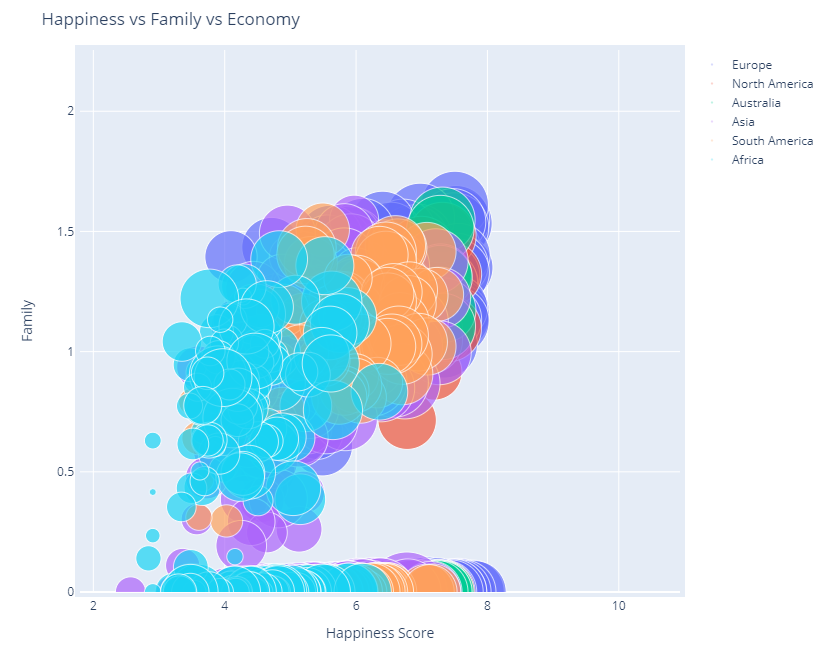

In [19]:
#hide_input
figure = bubbleplot(dataset = df, x_column = 'happiness_score', y_column = 'family', 
    bubble_column = 'country', size_column = 'gdp_per_capita', color_column = 'continent', 
    x_title = "Happiness Score", y_title = "Family", title = 'Happiness vs Family vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

**Inference:** 

The farther right side bubbless are mostly contries in the European Continents. Clearly they have better Family ratings. The most unsatisfied family rankings is actually mixture of mostly African, South American,Asian and a few European countries & North American countries.

### Happiness with regards to Govt Trust and Economy

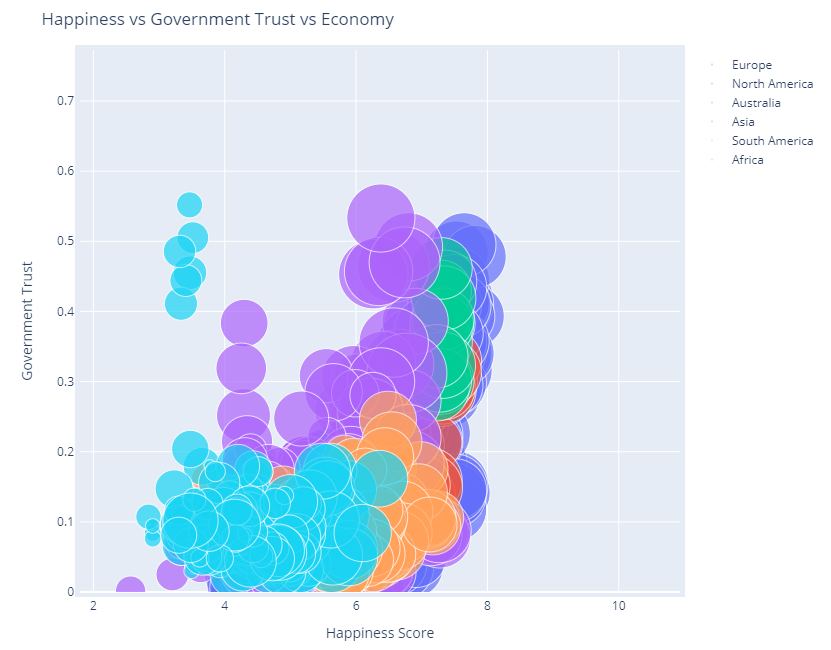

In [20]:
#hide_input
figure = bubbleplot(dataset = df, x_column = 'happiness_score', y_column = 'government_trust', 
    bubble_column = 'country', size_column = 'gdp_per_capita', color_column = 'continent', 
    x_title = "Happiness Score", y_title = "Government Trust", title = 'Happiness vs Government Trust vs Economy',
    x_logscale = False, scale_bubble = 1, height = 650)

py.iplot(figure, config={'scrollzoom': True})

**Inference:** 

Most countries rank low on government trust giving us insights into how most of the world population doesn't necessarily trust it's governments despite the ovearching push of democracy to be adoptee. High government trust countries are Rwanda and obvious countries of Sinagpore, New Zealand, Finland.

### World-wide View of Countries with regards to Generosity

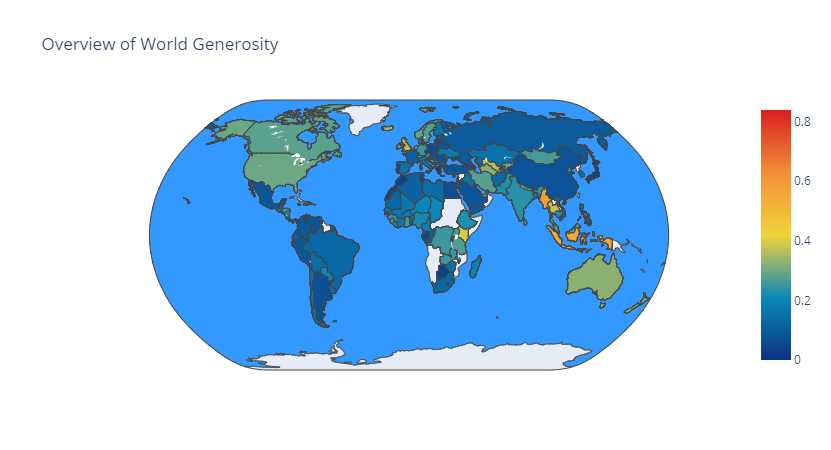

In [21]:
#hide_input
#plotting
trace1 = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = df['country'],
               text = df['country'], 
               z =df['generosity'],
               )]

layout = dict(title = 'Overview of World Generosity',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'natural earth'       )))


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

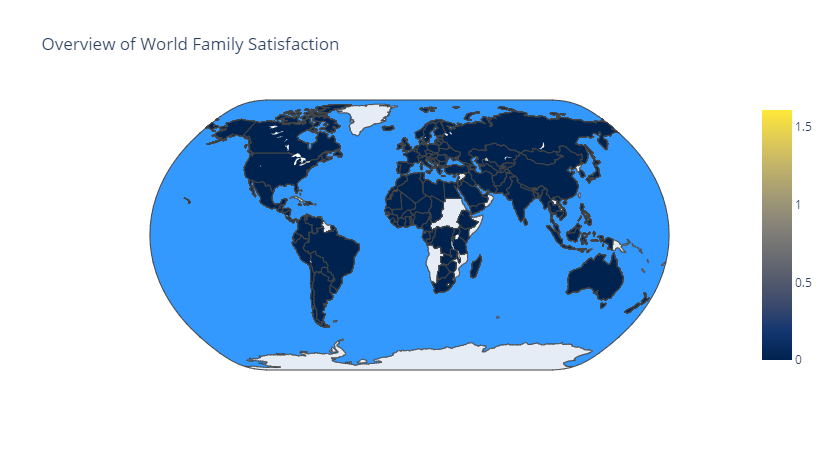

In [22]:
#hide_input
trace1 = [go.Choropleth(
               colorscale = 'Cividis',
               locationmode = 'country names',
               locations = df['country'],
               text = df['country'], 
               z =df['family'],
               )]

layout = dict(title = 'Overview of World Family Satisfaction',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'natural earth'       )))


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

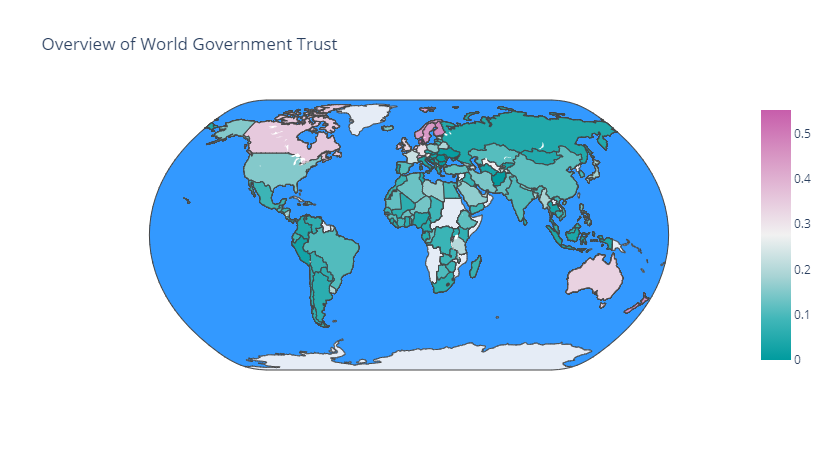

In [23]:
#hide_input
trace1 = [go.Choropleth(
               colorscale = 'tropic',
               locationmode = 'country names',
               locations = df['country'],
               text = df['country'], 
               z =df['government_trust'],
               )]

layout = dict(title = 'Overview of World Government Trust',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'natural earth'       )))


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

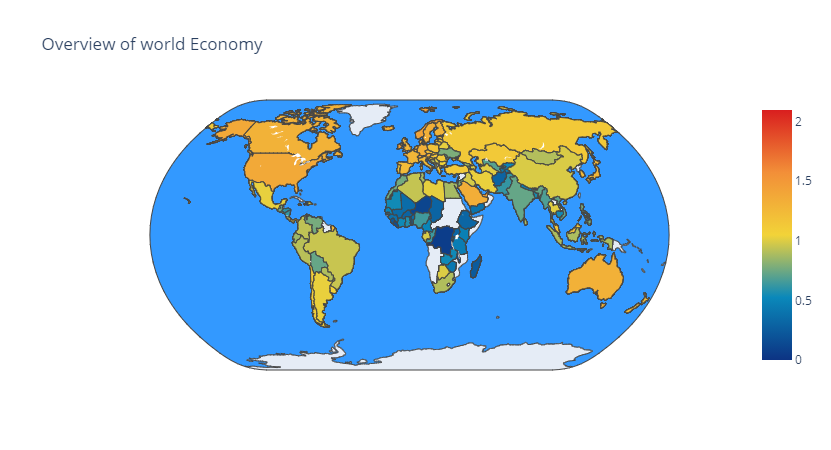

In [24]:
#hide_input
trace1 = [go.Choropleth(
               colorscale = 'Portland',
               locationmode = 'country names',
               locations = df['country'],
               text = df['country'], 
               z =df['gdp_per_capita'],
               )]

layout = dict(title = 'Overview of world Economy',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'natural earth'       )))


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

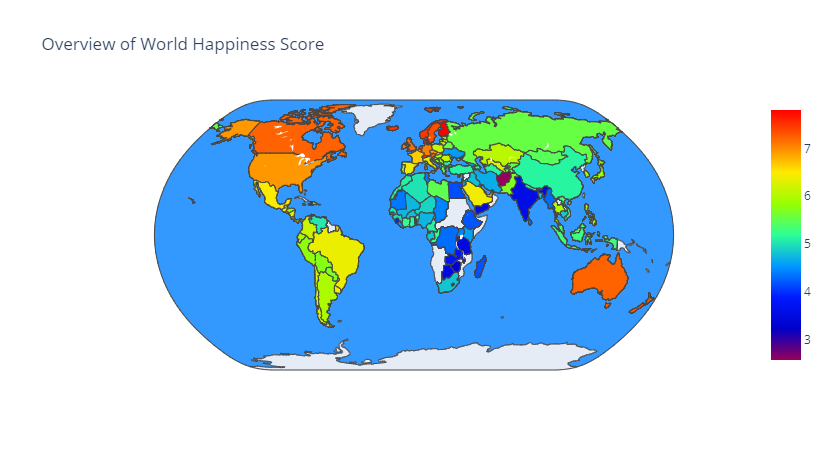

In [25]:
#hide_input
trace1 = [go.Choropleth(
               colorscale = 'rainbow',
               locationmode = 'country names',
               locations = df['country'],
               text = df['country'], 
               z =df['happiness_score'],
               )]

layout = dict(title = 'Overview of World Happiness Score',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'natural earth'       )))


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

### Trend of Happiness Over Time

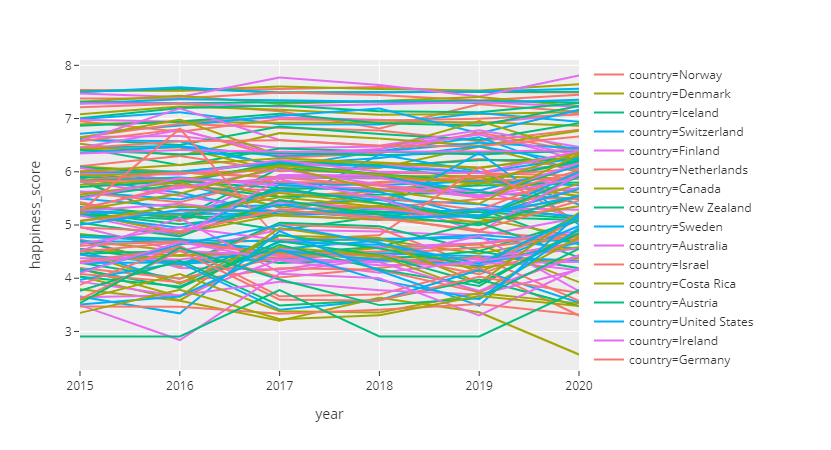

In [26]:
#hide_input
import plotly.express as px
fig=px.line(df,x='year',y='happiness_score',color='country',template="ggplot2")
py.iplot(fig, config={'scrollzoom': True})

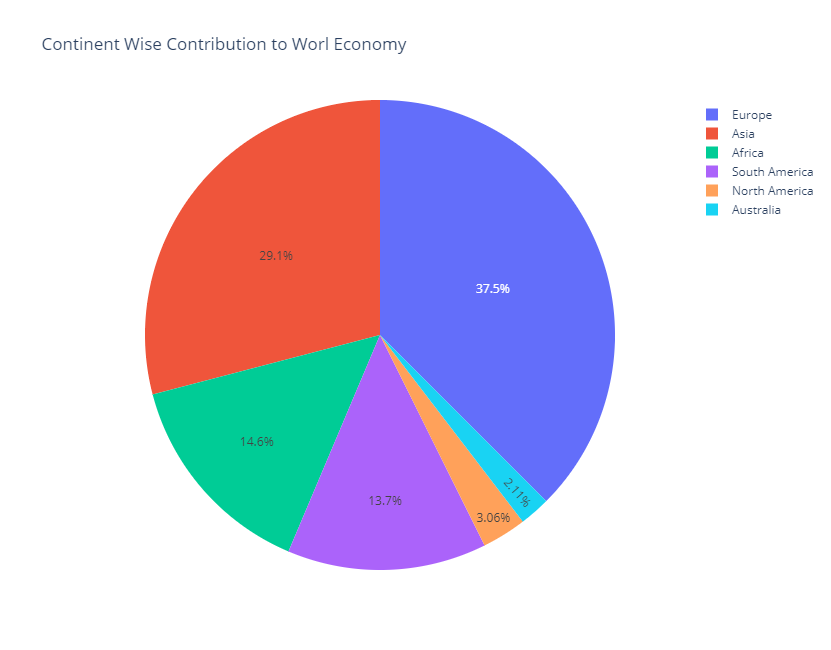

In [27]:
#hide_input
fig = px.pie(df, values='gdp_per_capita', names='continent', title='Continent Wise Contribution to Worl Economy',height=650)
py.iplot(fig, config={'scrollzoom': True})

From the chart we can notice that the continent of Europe has a good score of GDP per capita, compared to others. Australian countries contribute the least to global GDP.

# Part B 

Analyze and understand the relationship between Terror Attacks and Happiness Index

### Thoughts/ Motive

One of the things that intrigued us terrorism across the world. With wars and conflicts happening on a day to day basis, we really wanted to understand to what extent terrorism plays a role in happiness index. For this we combined two datasets - the Happiness Datasets and the World Terrorism dataset from Global Terrorism Database(GTD).

In our datasets, we have only took the count of terror attacks and not other information such as text based data surrounding the context of what happpened, names of the weapons used and so on since that would delve into NLP. Our future work in scope is using NLP to also analyse the datasets in order to better guage the relationship between happiness and terrorism. 

# Processing the Datasets

Now that we have seen EDA on Happiness Index, we were wondering what about terror attacks? Clearly the factors mentioned above are not sufficient enough to explain true happiness. So we decided to see how terror attacks combine with happiness index and to answer the question if there is a correlation present. 

### Below Cells take time to execute due to large dataset

### Terrorism Database

In [30]:
#hide
# Loading the Global Terrorism Databse
df = pd.read_excel("data/globalterrorismdb_0919dist.xlsx")

In [31]:
#hide_input
# Taking a look at the data
pd.set_option('display.max_columns', None)
df.head()

iyear         country_txt  latitude  longitude  \
0 2015.00                Iraq     33.30      44.37   
1 2015.00  Bosnia-Herzegovina     45.18      15.83   
2 2015.00                Iraq     33.30      44.37   
3 2015.00              Sweden     59.86      17.64   
4 2015.00               Libya     32.07      20.15   

                                             summary  \
0  01/03/2015: An explosive device planted on a m...   
1  01/01/2015: Assailants stabbed Selvedin Begano...   
2  01/01/2015: An explosive device planted in a v...   
3  01/01/2015: An assailant threw an explosive de...   
4  01/01/2015: Assailants attacked a Haftar milit...   

                  attacktype1_txt  attacktype1  \
0               Bombing/Explosion            1   
1                   Armed Assault            6   
2               Bombing/Explosion            1   
3  Facility/Infrastructure Attack            3   
4               Bombing/Explosion            7   

                    targtype1_txt  targsubtype1              targsubtype1_txt  \
0     Private Citizens & Property         73.00       Vehicles/Transportation   
1  Religious Figures/Institutions         85.00              Religious Figure   
2         Educational Institution         48.00  Teacher/Professor/Instructor   
3  Religious Figures/Institutions         86.00              Place of Worship   
4    Terrorists/Non-State Militia         94.00             Non-State Militia   

                   corp1                   target1  natlty1  \
0         Not Applicable                   Minibus    95.00   
1                Unknown  Imam: Selvedin Beganovic    28.00   
2  University of Baghdad                  Lecturer    95.00   
3                Unknown                    Mosque   198.00   
4         Haftar Militia                  204 Camp   113.00   

          natlty1_txt                                      gname  \
0                Iraq                                    Unknown   
1  Bosnia-Herzegovina                          Muslim extremists   
2                Iraq                                    Unknown   
3              Sweden                                    Unknown   
4               Libya  Shura Council of Benghazi Revolutionaries   

                                              motive  guncertain1  \
0                                                NaN         0.00   
1  The specific motive is unknown; however, sourc...         0.00   
2                                                NaN         0.00   
3  The specific motive is unknown; however, sourc...         0.00   
4                                                NaN         0.00   

   guncertain2  guncertain3  individual weaptype1_txt  nkill  
0          nan          nan        0.00    Explosives   2.00  
1          nan          nan        0.00         Melee   0.00  
2          nan          nan        0.00    Explosives   1.00  
3          nan          nan        0.00    Incendiary   0.00  
4          nan          nan        0.00    Explosives    nan

In [32]:
#hide
# taking just the years of which we have terrorism data
df_select = df.loc[(df["iyear"]==2015) | (df["iyear"]==2016) | (df["iyear"]==2017) | (df["iyear"]==2018)]

In [33]:
#hide
# getting the number of terror_attacks countrywise sorted by year
temp = df_select.pivot_table(index='country_txt', 
                     columns='iyear', 
                     values='attacktype1',
                     fill_value=0, 
                     aggfunc='count').unstack().to_frame(name="terror_attacks").reset_index()

### Happiness Index Database

In [34]:
#hide_input
# Combining all the happiness index dataset
all_files = glob.glob("*.csv")
li = []

for filename in all_files:
    cdf = pd.read_csv(filename, index_col=None, header=0)
    cdf["Year"] = [i for i in [int(filename.split("_")[0])] for _ in range(len(cdf))]
    cdf.replace({"Congo (Brazzaville)":"Democratic Republic of the Congo","Congo (Kinshasa)":"Republic of Congo"}, inplace=True)
    cdf.sort_values("country", inplace=True)
    li.append(cdf)
frame = pd.concat(li, axis=0, ignore_index=True)
frame

Year      continent                 country  dystopia_residual  family  \
0    2015           Asia             Afghanistan               2.15    0.58   
1    2015         Europe                 Albania               1.49    0.80   
2    2015         Africa                 Algeria               2.57    1.15   
3    2015  South America               Argentina               2.61    1.44   
4    2015           Asia                 Armenia               1.52    1.01   
5    2015      Australia               Australia               2.07    1.51   
6    2015         Europe                 Austria               2.14    1.46   
7    2015           Asia              Azerbaijan               1.76    1.15   
8    2015           Asia                 Bahrain               1.66    1.32   
9    2015           Asia              Bangladesh               1.98    0.74   
10   2015         Europe                 Belarus               1.72    1.44   
11   2015         Europe                 Belgium               2.12    1.46   
12   2015         Africa                   Benin               1.89    0.44   
13   2015  South America                 Bolivia               2.44    1.23   
14   2015         Europe  Bosnia and Herzegovina               1.89    1.07   
15   2015         Africa                Botswana               0.38    1.22   
16   2015  South America                  Brazil               2.77    1.43   
17   2015         Europe                Bulgaria               1.00    1.43   
18   2015         Africa            Burkina Faso               1.73    1.04   
19   2015         Africa                 Burundi               1.68    0.63   
20   2015           Asia                Cambodia               1.04    1.01   
21   2015         Africa                Cameroon               2.33    0.95   
22   2015  North America                  Canada               2.19    1.48   
23   2015         Africa                    Chad               2.07    0.95   
24   2015  South America                   Chile               2.51    1.28   
25   2015           Asia                   China               1.76    1.16   
26   2015  South America                Colombia               2.62    1.40   
27   2015  South America              Costa Rica               2.90    1.42   
28   2015         Europe                 Croatia               1.85    0.97   
29   2015           Asia                  Cyprus               1.62    1.13   
..    ...            ...                     ...                ...     ...   
798  2020         Europe                  Serbia               2.03     nan   
799  2020         Africa            Sierra Leone               2.05     nan   
800  2020           Asia               Singapore               0.94     nan   
801  2020         Europe                Slovakia               2.26     nan   
802  2020         Europe                Slovenia               1.89     nan   
803  2020         Africa            South Africa               1.63     nan   
804  2020           Asia             South Korea               1.95     nan   
805  2020         Europe                   Spain               2.00     nan   
806  2020           Asia               Sri Lanka               0.61     nan   
807  2020         Europe                  Sweden               2.25     nan   
808  2020         Europe             Switzerland               2.35     nan   
809  2020           Asia              Tajikistan               2.26     nan   
810  2020         Africa                Tanzania               0.72     nan   
811  2020           Asia                Thailand               1.83     nan   
812  2020         Africa                    Togo               2.41     nan   
813  2020         Africa                 Tunisia               1.53     nan   
814  2020           Asia                  Turkey               1.56     nan   
815  2020           Asia            Turkmenistan               1.12     nan   
816  2020         Africa                  Uganda       

In [35]:
#hide
frame.drop(["family", "dystopia_residual", "social_support", "continent"], axis=1, inplace=True)

In [36]:
#hide
enc = LabelEncoder()
enc.fit(frame.country)
frame["country_id"] = enc.transform(frame.country)

# Combining the datasets
final_df = pd.merge(frame, temp, left_on=["Year", "country"], right_on=["iyear", "country_txt"], how="left")

final_df = final_df.dropna(axis=0, how='any')
final_df.drop(["country_txt", "iyear"], axis=1, inplace=True)

final_df.to_csv("data/final_dataset.csv")

# Exploratory Data Analysis on Combines Dataset with Terrorism  

In [37]:
#hide
df = pd.read_csv("data/final_dataset.csv").drop(["Unnamed: 0", "country_id"], axis=1)

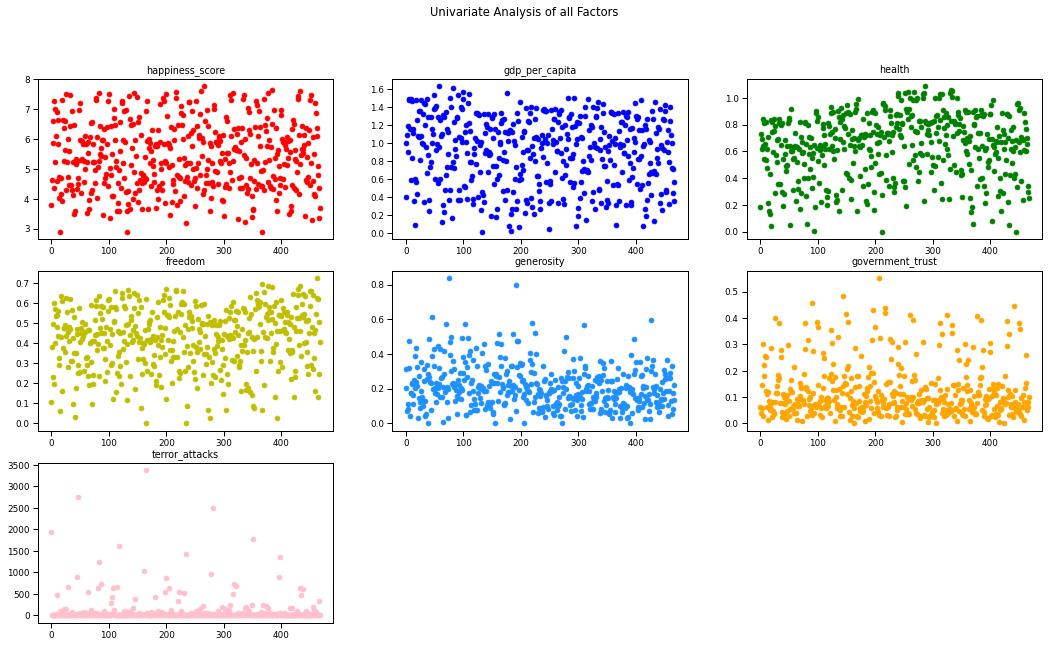

In [38]:
#hide_input
#univariate analysis
numerics = ['happiness_score', 'gdp_per_capita', 'health', 'freedom', 'generosity',
       'government_trust', 'terror_attacks']

color = ['r','blue','g','y','dodgerblue','orange','pink']

plt.figure(figsize = (18,10))
plt.suptitle("Univariate Analysis of all Factors")
for i in numerics:
    plt.subplot(3,3,numerics.index(i)+1)
    plt.scatter(np.arange(df.shape[0]),df[i], color = color[numerics.index(i)])
    plt.title(i)
plt.show()

We can see that there are some countries which go through alot of terrorist attacks

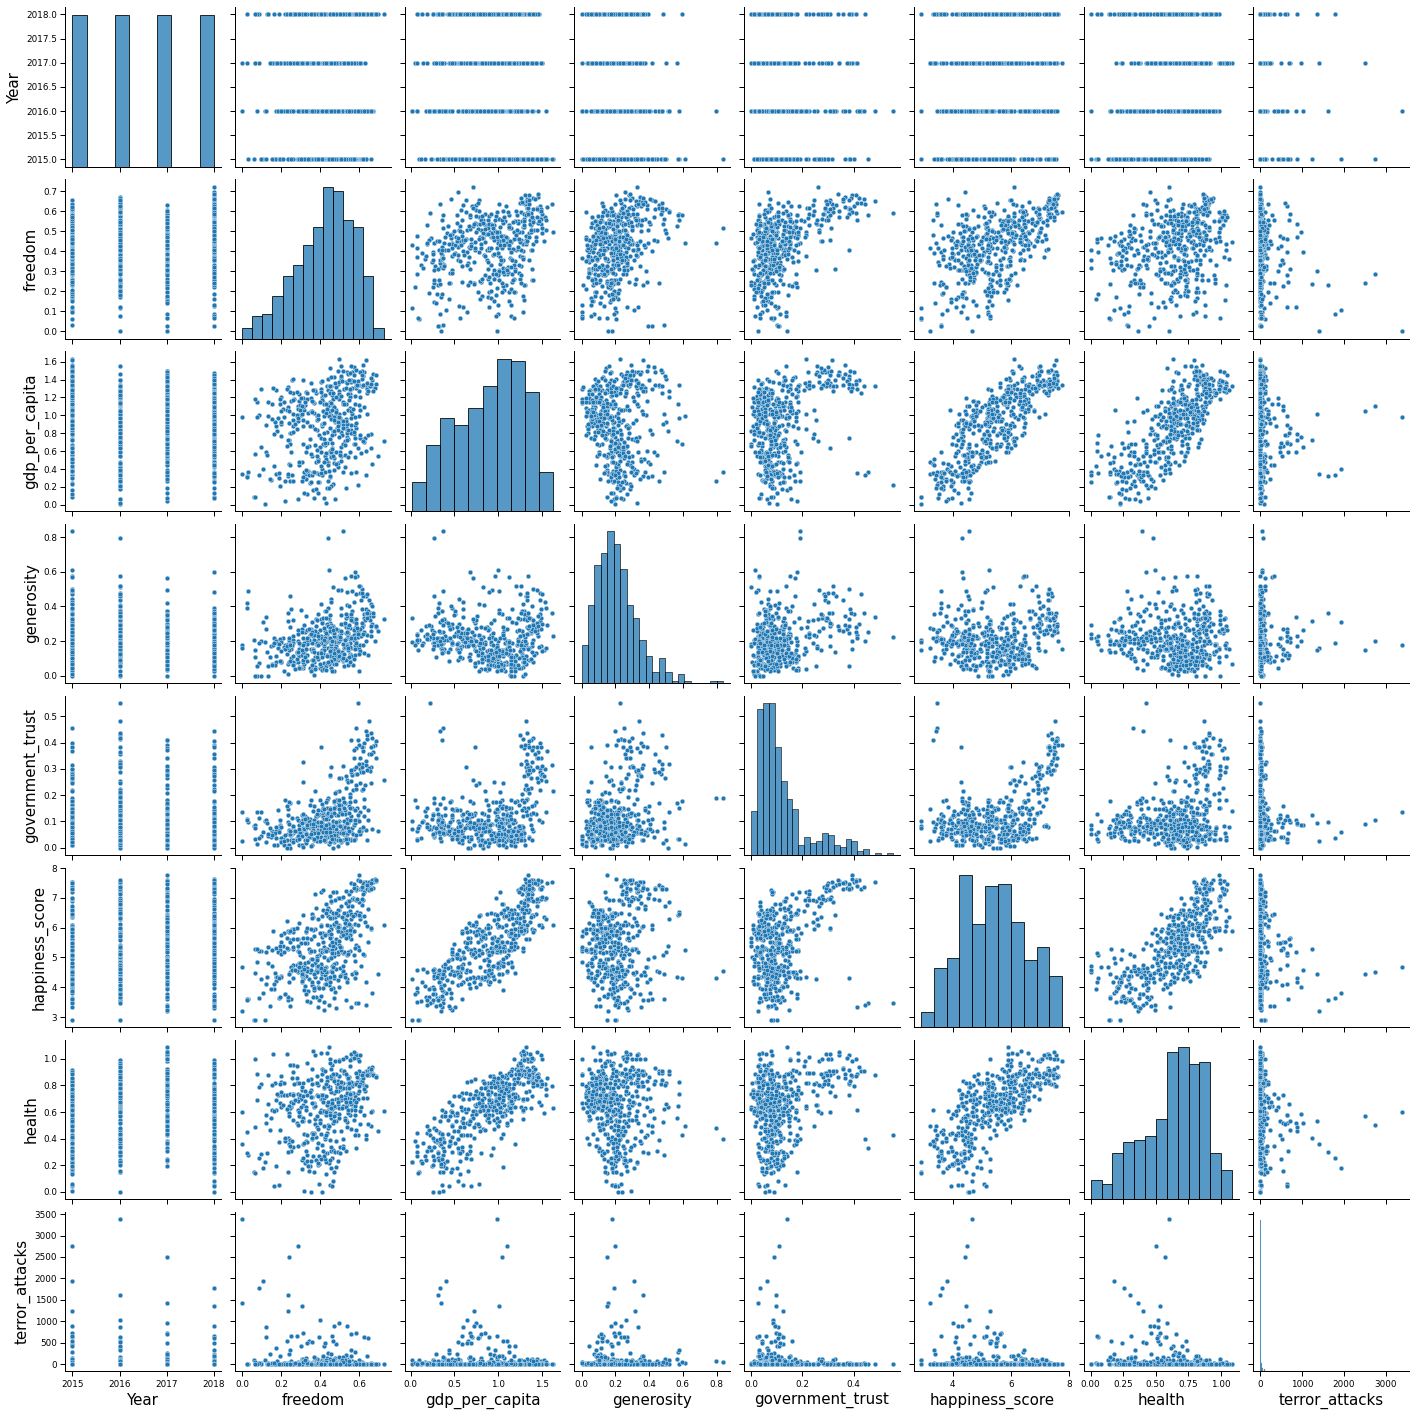

In [39]:
#hide_input
#Bivariate Analysis
sns.set_context("paper", rc={"axes.labelsize":15})
sns.pairplot(df);

There seems to be a: <br/>
**Linear Relationship:** happiness_score v/s gdp_per_capita, happiness_score v/s health, happiness_score v/s freedom <br/>
**Non-Linear Relationship:** happiness_score v/s gerosity, happiness_score v/s government_trust

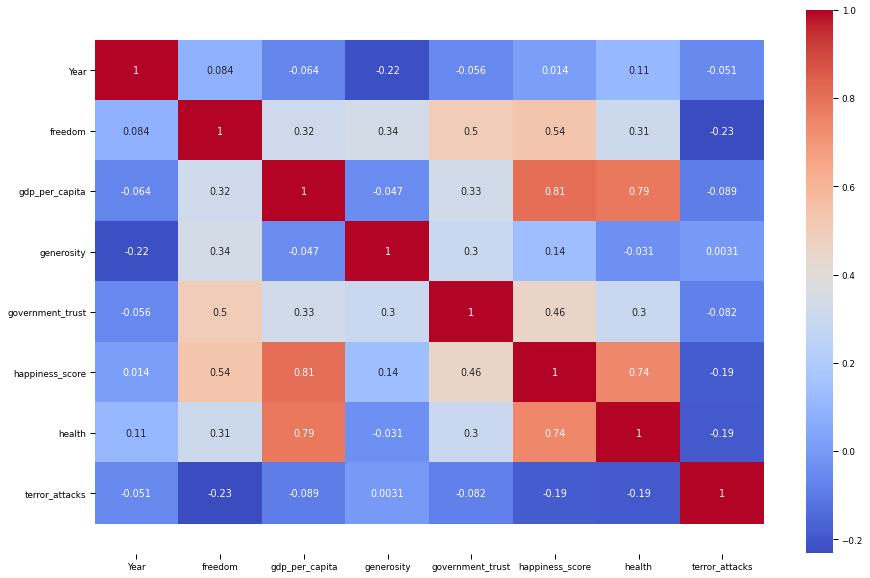

In [40]:
#hide_input
#Calculating the correlation matrix
corr = df.corr()

#Plotting it as a heatmap
plt.figure(figsize=(15,10))
sns.heatmap( corr, annot = True, cmap = 'coolwarm')
bottom, top = plt.ylim()
plt.ylim(bottom + 0.5, top - 0.5)
plt.show()

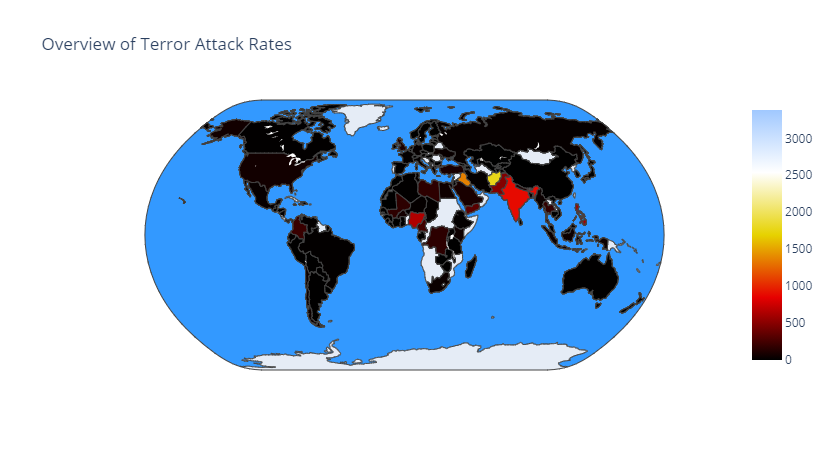

In [41]:
#hide_input
trace1 = [go.Choropleth(
               colorscale = 'blackbody',
               locationmode = 'country names',
               locations = df['country'],
               text = df['country'], 
               z =df['terror_attacks'],
               )]

layout = dict(title = 'Overview of Terror Attack Rates',
                  geo = dict(
                      showframe = True,
                      showocean = True,
                      showlakes = True,
                      showcoastlines = True,
                      projection = dict(
                          type = 'natural earth'       )))


fig = go.Figure(data = trace1, layout = layout)
py.iplot(fig)

**Inference**:

With the data that we have, there doesn't seem to be much correlation between terror attacks and happienss index. We would need more data to come to a singificant conclusion as to how terrorism really affects the happiness index. Perhaps another factors that would allow us to further understand the happiness index would be war conditions. Countries like Syria and Palestine, are in critical war zones which would make their living condtions poor and hence affecting the happiness index. 

## Part C 

To create a Model to Predict Happiness Index

# Predicting happiness Index

In [42]:
#hide
#Splitting into predictors and response variable
X = df.drop(["happiness_score","country"], axis=1)
y = df["happiness_score"]

In [43]:
#hide
# Scaling the predicators to make them between 0 and 1
scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [44]:
#hide
# Splitting into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
#hide
degrees = range(1, 7)
alphas = [1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100, 1000]
best_alpha = []
for degree in degrees:
    training_error, validation_error = [], []
    X_poly_train = PolynomialFeatures(degree).fit_transform(X_train)
    for alpha in alphas:
        lreg = Lasso(alpha=alpha, fit_intercept=False, max_iter=2000)
        cv = cross_validate(lreg, X_poly_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
        validation_error.append(-np.mean(cv['test_score']))
        training_error.append(-np.mean(cv['train_score']))
    best_a = alphas[validation_error.index(min(validation_error))]
    best_alpha.append([best_a, min(validation_error), min(training_error)])

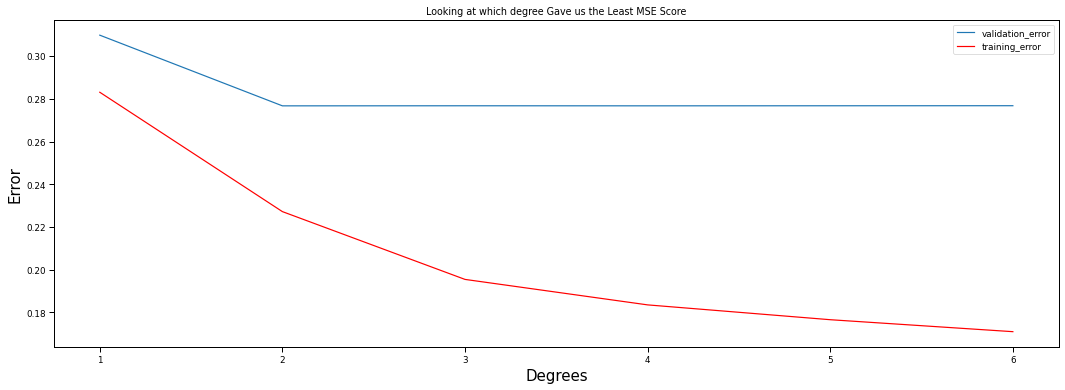

In [46]:
#hide_input
plt.figure(figsize=(18,6))
plt.plot(degrees, np.array(best_alpha)[:, 1], label = 'validation_error')
plt.plot(degrees, np.array(best_alpha)[:, 2], c='red', label = 'training_error')
plt.xlabel("Degrees")
plt.ylabel("Error")
plt.title("Looking at which degree Gave us the Least MSE Score")
plt.legend()
plt.show()

In [47]:
#hide_input
# Training the best model
best_degree = degrees[best_alpha.index(min(best_alpha, key=lambda x:x[1]))]
best_alphav = min(best_alpha, key=lambda x:x[1])[0]

X_poly_train = PolynomialFeatures(best_degree).fit_transform(X_train)
X_poly_test = PolynomialFeatures(best_degree).fit_transform(X_test)

lreg = Lasso(alpha=best_alphav, fit_intercept=False, max_iter=2000)
lreg.fit(X_poly_train, y_train)

#Testing the Model
y_pred_test = lreg.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)


#Model performance MEtrics
print("The MSE value of our model is: ", np.round(mse,2))
print("The R2 score of our model is : ", np.round(r2,3))

The MSE value of our model is:  0.25
The R2 score of our model is :  0.819


We used Lasso Regression with the degree of 6 to perform Polynomial Lasso Regression in order to predict the Happiness Score. 

**Our MSE value for Lasso Regression is 0.25 and our R2 Score is 0.82 which is pretty satisfactory.**

#### Why did we use Lasso Regression?

+ We understood that Lasso tends to do well if there are a small number of significant parameters and the others are close to zero (ergo: when only a few predictors actually influence the response). This was our case where our parameters no. was relatively small hence this seemed like the good approach to take. Ridge works well if there are many large parameters of about the same value (ergo: when most predictors impact the response).
+ Lasso, or Least Absolute Shrinkage and Selection Operator, is quite similar conceptually to ridge regression. It also adds a penalty for non-zero coefficients, but unlike ridge regression which penalizes sum of squared coefficients (the so-called L2 penalty), lasso penalizes the sum of their absolute values (L1 penalty). As a result, for high values of λ, many coefficients are exactly zeroed under lasso, which is never the case in ridge regression.

In [48]:
#hide_input
hap_regr = MLPRegressor(hidden_layer_sizes=(100, 50, 25), solver='adam', random_state=1, max_iter=500)
hap_regr.fit(X_train, y_train)
score = hap_regr.score(X_test, y_test)
pred = hap_regr.predict(X_test)
mse = mean_squared_error(y_test,pred)
print("The MSE value of our model is: ", np.round(mse,2))
print("The R2 score of our model is : ", np.round(score,2))

The MSE value of our model is:  0.27
The R2 score of our model is :  0.8


**What did we do in MLP Regressor?**

+ Our choice of multiple number of layers here is to depict non-linearity in the model. Multiple number of layers lead to non-linearity, but excess number of layers may lead to overfitting of the model.
+ Experimenting and trying out multiple combinations of layers and neurons, three layers with depicted neurons turned out to be suitable for our model.
+ Also, we used the default Activation Function, ReLu because of our model being a Linear Regression Model and ReLu fits the best for this problem.

**Our MSE value for MLP Regressor is 0.26 and our R2 Score is 0.82 which is pretty much the same as Lasso Regression.**

# Predicting Terrorist attacks

We also tried experimenting witht the variables we have from the happiness dataset to see if we can satisfactorily predict no. of terrorist attacks likely to happen. 

Of course the model does not have the best performance because we understand that there are more factors that affect the outcome. 

**Our future work here is to get more external factors relating to what sparks terrorim attacks and create model to allow for better risk handling.**

In [49]:
#hide_input
# Making a terrorism index where countries with terror_attacks 100 or above will have a value 1
df["terror_attacks"][df["terror_attacks"]>100]=100

# doing non-linear scaling
df["terror_attacks"] = np.sqrt(df["terror_attacks"])
scaler = MinMaxScaler()
df["terror_attacks"] = scaler.fit_transform(df[["terror_attacks"]])

In [50]:
#hide_input
# Assigning predictors and response variables
X = df.drop(["terror_attacks",'country'], axis=1)
y = df["terror_attacks"]

In [51]:
#hide_input
# Splitting into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#hide_input
# Using Neural Nets for a best possible prediction
regr = MLPRegressor(hidden_layer_sizes=(100, 50, 25), solver='adam', random_state=1, max_iter=500)
regr.fit(X_train, y_train)
print("The R2 score of our model is: ",regr.score(X_test, y_test))


The R2 score of our model is:  -0.604910576024011


Clearly our model is not performing well here. 

## Part D

To see how much Health contributes to the Happiness Index? With the current pandemic at hand, predicting COVID-19 Cases in the coming days for countries.

### Thoughts

From Part A, we have realized that Health does play a major role in a country's happiness score. With the current pandemic at hand, we were motivated to look at COVID cases and forecast the upcoming cases. We wanted to compare the COVID data with the happiness index data, however, we felt that it would not give the right results since the happiness index data of 2020 is from the months of January-February when there was not much COVID health crisis happening. 

However, in pursuit of excitement and interest, we decided to go forth to do a basic forecasting model on COVID-19 dataset using fbprophet.

### What and Why Prophet?

Prophet is Facebooks'open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. It has intuitive hyper parameters which are easy to tune.

**Prophet time series = Trend + Seasonality + Holiday + error**

Trend models non periodic changes in the value of the time series. Seasonality is the periodic changes like daily, weekly, or yearly seasonality. Holiday effect which occur on irregular schedules over a day or a period of days. Error terms is what is not explained by the model.

We believe that the advantages of using Prophet are:
+ Accommodates seasonality with multiple periods
+ Prophet is resilient to missing values
+ Best way to handle outliers in Prophet is to remove them
+ Fitting of the model is fast
+ Intuitive hyper parameters which are easy to tune

In [53]:
#hide
# Taking inputs from the user
country='India'       # User Input 1
column='new_cases'    # User Input 2
forecast_period=30    # User Input 3

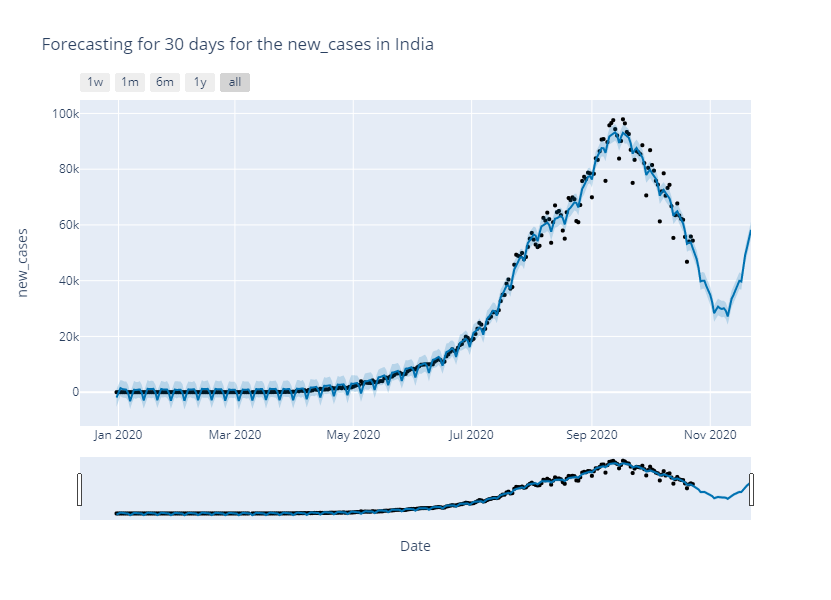

In [54]:
#hide_input
#Reading DataFrames
df= pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")
df = df[df['location']!='Hong Kong']
df['date'] = pd.to_datetime(df['date'],utc=False)
data=df[df['location']==country][['date',column]].rename(columns={"date":"ds",column:"y"})

#Initializing Model
m=Prophet(seasonality_mode='additive',yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True)

#Fitting Data
m.fit(data)
#Making Future Predictions
future=m.make_future_dataframe(periods=forecast_period)
forecast = m.predict(future)

#Visualizing Forecast
fig=plot_plotly(m, forecast)
fig.update_layout(
title="Forecasting for "+str(forecast_period)+" days for the "+column+" in "+country,
xaxis_title="Date",
yaxis_title=column)
fig.show()


### The performance of the model

In [73]:
#hide
import warnings
import logging
# Turn off pystan warnings
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)

# Turn off fbprophet stdout logger
logging.getLogger('fbprophet').setLevel(logging.ERROR)

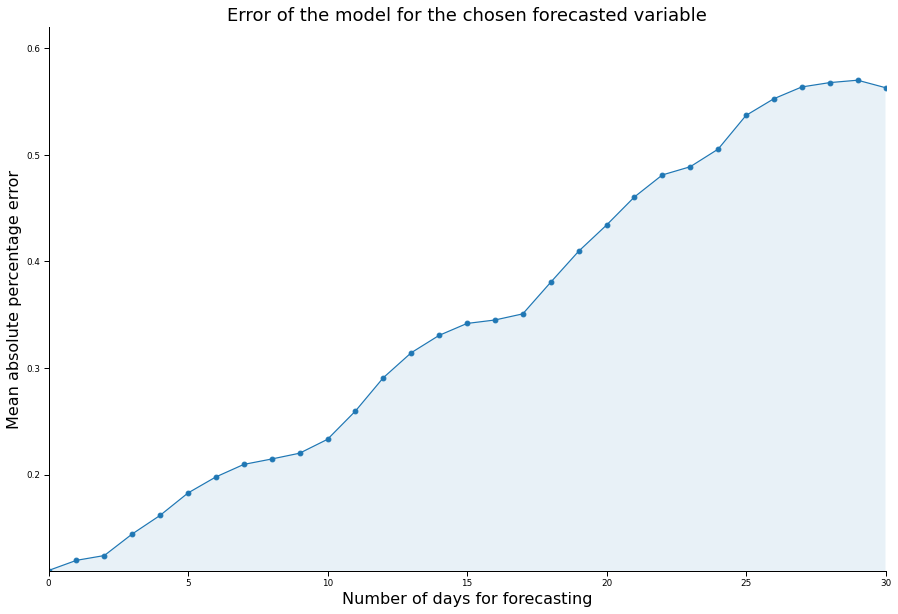

In [74]:
#hide_input
cross_validation_results = cross_validation(m,initial='100 days',horizon="50 days")
performance_metrics_results = performance_metrics(cross_validation_results)
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111)
ax.plot(range(31),performance_metrics_results['mape'][:31],marker="o")
ax.set_xlabel('Number of days for forecasting',fontsize=16)
ax.set_ylabel("Mean absolute percentage error",fontsize=16)
ax.set_title("Error of the model for the chosen forecasted variable",fontsize=18)
ax.fill_between(range(31), 0, performance_metrics_results['mape'][:31], alpha=.1)
ax.set_xlim([0,30])
ax.set_ylim([min(performance_metrics_results['mape'][:31]),max(performance_metrics_results['mape'][:31])+.05])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Part E

Creating a Dashbord for viewing COVID-19 Predictions


## Our very own COVID-19 Forecasting Dashboard

Using the model that we built, we created a COVID-19 Forecasting Dashboard. You can view it in this link:

https://covid-prediction.herokuapp.com/

Our main motivation here was to be able to learn how to best provide the model outcomes to audience.

You can see the code in our file under the name: Covid-pred

# Conclusions

+ The data factors being used for calculating the Happiness Index of the countries is not holistic and inclusive. There are other factors to also be considered. GDP per capita seems to be a skewed figure itself and the limitations that GDP poses is highly likely to bias the happiness score.

+ We did not find much correlation between no. of terror attacks and happiness index of a country. However, we believe we need to consider more factors & influences pertaining to terrorism for us to properly see the relationship. 

+ For COVID-19 forecasts, we performed univariate analysis on our historical data, which made us realize that historical data alone might not be sufficient for the prediction. But certainly, this is one of the main predictors and it can be used with other set of predictors to create a more powerful model.

# Improvements That Can Be Done

**Improvement:** Figure out another way to calculate Happiness Index of a country which includes more holistic and inclusive factors

Based on our observations, we believe that factors apart from 6 selected need to be considered in order to make accurate happiness index scoring.  A possible improvement would be to research on an alternative way to calculate the index without using GDP per capita as a score 

**Improvement:** To move into using NLP & Decision Trees for analyzing Terrorism Data

Most of the factors in the Terrorism Dataset were text based. Hence, using NLP here will be best for us to understand the influences of the predictor on the response. To improve model prediction, we believe models pertaining to Decision Trees will help. 

**Improvement:** To move into Multivariate Analysis

We forecasted COVID-19 cases using only past data – however, we are aware that historical data alone is not enough to make accurate forecasts. There are many other external factors – our intention was to more or less look at the trend and observe how this trend will move in the future. 